In [6]:
import json
from model_api import eval_metric_model
import model_api

with open('train_data.json', 'r') as fin:
    train_data = [json.loads(s) for s in fin.readlines()]

In [3]:
import random
def sample_data(data, n, seed=42):
    random.seed(seed)
    return random.sample(data, n)

In [4]:
seed = 42
train_data_sample = sample_data(train_data, 5, seed=seed)
train_data_sample

[{'Text': 'Техническая организация хостинга / Habr             \n\n02-06-2009\nВ прошлый раз я рассказал о том, как не нужно строить организационную часть хостинга. Сейчас я расскажу о том, как можно организовать техническую. Есть шесть вещей, на которые опирается любой хостинг-провайдер: Сервер, Панель, Домены, Бухгалтерия, Поддержка, Юридическая организация. Сейчас я расскажу основные варианты выбора. Сервер. Четыре варианта: Реселлинг — недорого, не нужно заниматься настройкой сервера. Но Вы зависите от вышестоящего хостера больше, чем в других случаях. Везде, кроме cpanel нельзя создавать саб-реселлеров (Не завидую таким клиентам). Качественный реселлинг обычно стоит от 10-15$ за гигабайт. VDS или Виртуальный выделенный сервер — нужно заниматься настройкой сервера, полная свобода выбора, что и как делать. Если что-то поломаете, придется исправлять самим. К тому, же есть небольшая зависимость от владельца VDS-ноды. Стоимость от 30$ за VDS с 368 Мб RAM (Меньше никак нельзя, пожалейте

In [4]:
[len(d['Text']) for d in train_data_sample][2]

8251

In [7]:
from utils import eval_metric_model, run_experiment


pre_instructions = '''Напиши краткое содержание (резюме), которое соответствует этим 6 критериям качества:
1. Comprehensible: Резюме может быть прочитано и понято человеком.
2. Repetition: В резюме нет лишнего повторения информации.
3. Grammar: Резюме грамматически правильно.
4. Attribution: Вся информация в резюме полностью соответствует источнику статьи.
5. Main ideas: Резюме передает основную идею (идеи) исходной статьи.
6. Conciseness: Резюме кратко представляет информацию из исходной статьи.'''

post_instructions = '''Напиши краткое содержание (резюме), которое соответствует этим критериям качества: краткое содержание грамматически верно, нет лишнего повторения информации, кратко представляет информацию из исходной статьи, соответствует исходной статьи (нет лжи и неточностей), передает основную идею (идеи) исходной статьи.'''

experiment_params = {
    "pre_instructions": pre_instructions,
    "post_instructions": post_instructions,
    "max_tokens": 2500,
    "temperature": 0.5,
    "n_generations": 5,
}

results_0 = run_experiment(train_data_sample, experiment_params)

Total data samples=5


 20%|██        | 1/5 [00:10<00:40, 10.20s/it]

Eval score stats: idx=0, mean=0.4868652, std=0.19338073220608099, baseline=0.62109375


 40%|████      | 2/5 [00:21<00:32, 10.76s/it]

Eval score stats: idx=1, mean=0.5453124, std=0.07371023963222476, baseline=0.59765625


 60%|██████    | 3/5 [00:32<00:21, 10.89s/it]

Eval score stats: idx=2, mean=0.5627932, std=0.11710824509555251, baseline=0.6547851563


 80%|████████  | 4/5 [00:41<00:10, 10.26s/it]

Eval score stats: idx=3, mean=0.3469238, std=0.05997262130472537, baseline=0.4057617188


100%|██████████| 5/5 [00:50<00:00, 10.16s/it]

Eval score stats: idx=4, mean=0.6920898, std=0.04706054163479211, baseline=0.6665039063


In [8]:
from utils import eval_metric_model, run_experiment

# Shorter pre-instructions
pre_instructions = '''Ниже будет представлен текст статьи. Напиши для него краткое содержание.'''

post_instructions = '''Напиши краткое содержание, которое соответствует этим критериям качества: краткое содержание грамматически верно, нет лишнего повторения информации, кратко представляет информацию из исходной статьи, соответствует исходной статьи (нет лжи и неточностей), передает основную идею (идеи) исходной статьи.'''

experiment_params = {
    "pre_instructions": pre_instructions,
    "post_instructions": post_instructions,
    "max_tokens": 2500,
    "temperature": 0.5,
    "n_generations": 5,
}

results_1 = run_experiment(train_data_sample, experiment_params)

Total data samples=5


 20%|██        | 1/5 [00:10<00:41, 10.27s/it]

Eval score stats: idx=0, mean=0.5155272, std=0.06158282294731218, baseline=0.62109375


 40%|████      | 2/5 [00:24<00:38, 12.86s/it]

Eval score stats: idx=1, mean=0.5503908, std=0.03470768674746273, baseline=0.59765625


 60%|██████    | 3/5 [00:34<00:23, 11.55s/it]

Eval score stats: idx=2, mean=0.5554690000000001, std=0.11145338383736943, baseline=0.6547851563


 80%|████████  | 4/5 [00:43<00:10, 10.32s/it]

Eval score stats: idx=3, mean=0.31499020000000005, std=0.0339915289529612, baseline=0.4057617188


100%|██████████| 5/5 [00:51<00:00, 10.25s/it]

Eval score stats: idx=4, mean=0.6790038, std=0.02428797807475954, baseline=0.6665039063


In [9]:
from utils import eval_metric_model, run_experiment

# Low temperature
pre_instructions = '''Ниже будет представлен текст статьи. Напиши для него краткое содержание.'''

post_instructions = '''Напиши краткое содержание, которое соответствует этим критериям качества: краткое содержание грамматически верно, нет лишнего повторения информации, кратко представляет информацию из исходной статьи, соответствует исходной статьи (нет лжи и неточностей), передает основную идею (идеи) исходной статьи.'''

experiment_params = {
    "pre_instructions": pre_instructions,
    "post_instructions": post_instructions,
    "max_tokens": 2500,
    "temperature": 0.35,
    "n_generations": 5,
}

results_2 = run_experiment(train_data_sample, experiment_params)

Total data samples=5


 20%|██        | 1/5 [00:07<00:29,  7.30s/it]

Eval score stats: idx=0, mean=0.5222656, std=0.01768248214024264, baseline=0.62109375


 40%|████      | 2/5 [00:14<00:21,  7.31s/it]

Eval score stats: idx=1, mean=0.547705, std=0.06914399793185232, baseline=0.59765625


 60%|██████    | 3/5 [00:24<00:17,  8.68s/it]

Eval score stats: idx=2, mean=0.5679686, std=0.03956271280688424, baseline=0.6547851563


 80%|████████  | 4/5 [00:32<00:08,  8.43s/it]

Eval score stats: idx=3, mean=0.34199199999999996, std=0.07907969372727743, baseline=0.4057617188


100%|██████████| 5/5 [00:43<00:00,  8.79s/it]

Eval score stats: idx=4, mean=0.6941406000000001, std=0.03302416296350296, baseline=0.6665039063


In [10]:
from utils import eval_metric_model, run_experiment


pre_instructions = '''Напиши краткое содержание (резюме), которое соответствует этим 6 критериям качества:
1. Comprehensible: Резюме может быть прочитано и понято человеком.
2. Repetition: В резюме нет лишнего повторения информации.
3. Grammar: Резюме грамматически правильно.
4. Attribution: Вся информация в резюме полностью соответствует источнику статьи.
5. Main ideas: Резюме передает основную идею (идеи) исходной статьи.
6. Conciseness: Резюме кратко представляет информацию из исходной статьи.'''

post_instructions = '''Напиши краткое содержание (резюме), которое соответствует этим критериям качества: краткое содержание грамматически верно, нет лишнего повторения информации, кратко представляет информацию из исходной статьи, соответствует исходной статьи (нет лжи и неточностей), передает основную идею (идеи) исходной статьи.'''

experiment_params = {
    "pre_instructions": pre_instructions,
    "post_instructions": post_instructions,
    "max_tokens": 2500,
    "temperature": 0.3,
    "n_generations": 5,
}

results_3 = run_experiment(train_data_sample, experiment_params)

Total data samples=5


 20%|██        | 1/5 [00:11<00:44, 11.10s/it]

Eval score stats: idx=0, mean=0.5278805999999999, std=0.07122327179960214, baseline=0.62109375


 40%|████      | 2/5 [00:18<00:26,  8.77s/it]

Eval score stats: idx=1, mean=0.5337404, std=0.07013694427503954, baseline=0.59765625


 60%|██████    | 3/5 [00:27<00:17,  8.88s/it]

Eval score stats: idx=2, mean=0.5789552, std=0.06354349464547884, baseline=0.6547851563


 80%|████████  | 4/5 [00:39<00:10, 10.26s/it]

Eval score stats: idx=3, mean=0.33398459999999996, std=0.039262201714116866, baseline=0.4057617188


100%|██████████| 5/5 [00:50<00:00, 10.02s/it]

Eval score stats: idx=4, mean=0.6973632, std=0.018849174341599165, baseline=0.6665039063


In [19]:
# extarct eval_scores
eval_scores_2 = [r['eval_scores'] for r in results_2]
eval_scores_2

[[0.495117, 0.54248, 0.508301, 0.53125, 0.53418],
 [0.562988, 0.414795, 0.566406, 0.616699, 0.577637],
 [0.51416, 0.535156, 0.574707, 0.625488, 0.590332],
 [0.325684, 0.215576, 0.38623, 0.327148, 0.455322],
 [0.748047, 0.681152, 0.686035, 0.70752, 0.647949]]

In [17]:
# extarct eval_scores
eval_scores_3 = [r['eval_scores'] for r in results_3]
eval_scores_3

[[0.434814, 0.609863, 0.45166, 0.584961, 0.558105],
 [0.605469, 0.51709, 0.575684, 0.405518, 0.564941],
 [0.553223, 0.489014, 0.564453, 0.606934, 0.681152],
 [0.285645, 0.396973, 0.350098, 0.336914, 0.300293],
 [0.716797, 0.718262, 0.689453, 0.694824, 0.66748]]

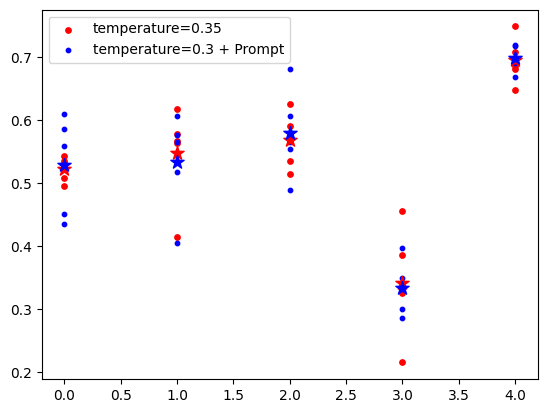

In [37]:
from matplotlib import pyplot as plt

for idx in range(len(eval_scores_3)):
    n_generations = len(eval_scores_3[idx])
    plt.scatter([idx]*n_generations, eval_scores_2[idx], c='r', s=15)
    plt.scatter([idx]*n_generations, eval_scores_3[idx], c='b', s=10)
    mean_2 = sum(eval_scores_2[idx])/n_generations
    mean_3 = sum(eval_scores_3[idx])/n_generations
    plt.scatter([idx], [mean_2], c='r', s=100, marker='*')
    plt.scatter([idx], [mean_3], c='b', s=100, marker='*')
plt.legend(['temperature=0.35', 'temperature=0.3 + Prompt'])

In [36]:
import numpy as np
from scipy.stats import ttest_rel, wilcoxon

def paired_test(scores_model_1, scores_model_2, axis=1):
    """Perform a paired t-test between two models.

    Args:
        scores_model_1 (list): List of scores for model 1, NxM
        scores_model_2 (list): List of scores for model 2, NxM

    """
    # Average scores across repetitions
    mean_scores_model_1 = np.mean(scores_model_1, axis=axis)
    mean_scores_model_2 = np.mean(scores_model_2, axis=axis)

    # Perform a paired t-test
    t_statistic, p_value = ttest_rel(mean_scores_model_1, mean_scores_model_2)

    print("Paired t-test results:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # If the data is not normally distributed, use the Wilcoxon signed-rank test
    w_statistic, p_value_wilcoxon = wilcoxon(mean_scores_model_1, mean_scores_model_2)

    print("\nWilcoxon signed-rank test results:")
    print(f"Statistic: {w_statistic}")
    print(f"P-value: {p_value_wilcoxon}")


In [44]:
paired_test(eval_scores_2, eval_scores_3)
print()
paired_test(eval_scores_2, eval_scores_3, 0)

Paired t-test results:
T-statistic: 0.09364578701527045
P-value: 0.929893682209875

Wilcoxon signed-rank test results:
Statistic: 7.0
P-value: 1.0
Paired t-test results:
T-statistic: 0.023954948471072227
P-value: 0.9820359361821137

Wilcoxon signed-rank test results:
Statistic: 5.0
P-value: 0.625


In [4]:
import numpy as np
eval_scores_2 = [[0.495117, 0.54248, 0.508301, 0.53125, 0.53418],
 [0.562988, 0.414795, 0.566406, 0.616699, 0.577637],
 [0.51416, 0.535156, 0.574707, 0.625488, 0.590332],
 [0.325684, 0.215576, 0.38623, 0.327148, 0.455322],
 [0.748047, 0.681152, 0.686035, 0.70752, 0.647949]]

eval_scores_3 = [[0.434814, 0.609863, 0.45166, 0.584961, 0.558105],
 [0.605469, 0.51709, 0.575684, 0.405518, 0.564941],
 [0.553223, 0.489014, 0.564453, 0.606934, 0.681152],
 [0.285645, 0.396973, 0.350098, 0.336914, 0.300293],
 [0.716797, 0.718262, 0.689453, 0.694824, 0.66748]]

np.array(eval_scores_2).mean(), np.array(eval_scores_3).mean()

(0.53481436, 0.5343847999999999)

In [4]:
iam_token = 't1.9euelZqZyI-Rk5Gbiouak8aMx8_Ik-3rnpWaz42dm4uLzouOlsfMypLLyZfl8_cWLx9U-e8VEz4r_d3z91ZdHFT57xUTPiv9zef1656VmpbHzpnNm5bOlJLLjZSNjY3P7_zF656VmpbHzpnNm5bOlJLLjZSNjY3P.IeBKxXTkKJDtD6q0bD90L9eyWXavaoXqyl3xBEW5ibhsF-ZtSp7Y6si8cRTBBznBHonjjaZYhp5XYXxtH_G6BA'

In [27]:
train_data_sample

[{'Text': 'Техническая организация хостинга / Habr             \n\n02-06-2009\nВ прошлый раз я рассказал о том, как не нужно строить организационную часть хостинга. Сейчас я расскажу о том, как можно организовать техническую. Есть шесть вещей, на которые опирается любой хостинг-провайдер: Сервер, Панель, Домены, Бухгалтерия, Поддержка, Юридическая организация. Сейчас я расскажу основные варианты выбора. Сервер. Четыре варианта: Реселлинг — недорого, не нужно заниматься настройкой сервера. Но Вы зависите от вышестоящего хостера больше, чем в других случаях. Везде, кроме cpanel нельзя создавать саб-реселлеров (Не завидую таким клиентам). Качественный реселлинг обычно стоит от 10-15$ за гигабайт. VDS или Виртуальный выделенный сервер — нужно заниматься настройкой сервера, полная свобода выбора, что и как делать. Если что-то поломаете, придется исправлять самим. К тому, же есть небольшая зависимость от владельца VDS-ноды. Стоимость от 30$ за VDS с 368 Мб RAM (Меньше никак нельзя, пожалейте

In [28]:
from experiment import run_experiment
from model_api import yagpt_summarization
from post_process import post_process_yagpt_summarization

def run_fn(article):
    s = yagpt_summarization(article, iam_token, temperature=0.1)
    # s = post_process_yagpt_summarization(s)
    return s

results_yagpt_sum = run_experiment(train_data_sample[3:], run_fn, "yagpt_summarization_exp0.json", 3, sleep_time=5)

Total data samples=2


 50%|█████     | 1/2 [00:22<00:22, 22.44s/it]

Eval score stats: idx=0, mean=0.3804523333333334, std=0.01633155820966131, baseline=0.4057617188


100%|██████████| 2/2 [00:48<00:00, 24.35s/it]

Eval score stats: idx=1, mean=0.6056313333333333, std=0.04630416354449729, baseline=0.6665039063


In [29]:
results_yagpt_sum

[{'idx': 0,
  'id': None,
  'eval_scores': [0.371826, 0.366211, 0.40332],
  'summaries': ['- Автор статьи решил создать утилиту для создания щелевых фотографий.\n- Он использовал камеру GoPro и ноутбук для съемки синичек.\n- Результаты съемки оказались плачевными, так как синички летали слишком быстро.\n- Автор решил добавить ключ -hz в код, чтобы сделать щелевое фото горизонтальной щелью.\n- Результат оказался интересным, но скучным.\n- Автор надеется, что несложный код снизит порог вхождения в создание щелевых фотографий.',
   '- Автор статьи решил создать утилиту для создания щелевых фотографий.\n- Он использовал камеру GoPro и ноутбук для съемки синичек.\n- Результаты съемки оказались плачевными, так как синички летали очень быстро.\n- Автор решил добавить ключ -hz в код, чтобы сделать щелевое фото горизонтальной щелью.\n- Результат оказался интересным, но скучным.\n- Автор надеется, что несложный код снизит порог вхождения в щелевую съемку.',
   '- Автор статьи решил создать утили

In [30]:

with open('yagpt_summarization_exp0.json', 'r') as fin:
    results_yagpt_sum = [json.loads(s) for s in fin.readlines()]
results_yagpt_sum

[{'idx': 0,
  'id': None,
  'eval_scores': [0.371826, 0.366211, 0.40332],
  'summaries': ['- Автор статьи решил создать утилиту для создания щелевых фотографий.\n- Он использовал камеру GoPro и ноутбук для съемки синичек.\n- Результаты съемки оказались плачевными, так как синички летали слишком быстро.\n- Автор решил добавить ключ -hz в код, чтобы сделать щелевое фото горизонтальной щелью.\n- Результат оказался интересным, но скучным.\n- Автор надеется, что несложный код снизит порог вхождения в создание щелевых фотографий.',
   '- Автор статьи решил создать утилиту для создания щелевых фотографий.\n- Он использовал камеру GoPro и ноутбук для съемки синичек.\n- Результаты съемки оказались плачевными, так как синички летали очень быстро.\n- Автор решил добавить ключ -hz в код, чтобы сделать щелевое фото горизонтальной щелью.\n- Результат оказался интересным, но скучным.\n- Автор надеется, что несложный код снизит порог вхождения в щелевую съемку.',
   '- Автор статьи решил создать утили

In [16]:
from experiment import run_experiment
from model_api import yagpt_summarization, eval_metric_model
from post_process import post_process_yagpt_summarization
import numpy as np

with open('yagpt_summarization_exp0.json', 'r') as fin:
    results_yagpt_sum = [json.loads(s) for s in fin.readlines()]


results_yagpt_sum2 = []

for idx, res in enumerate(results_yagpt_sum):
    eval_scores = []
    summaries = []
    for i_try, summary in enumerate(res['summaries']):
        summary_cleaned = post_process_yagpt_summarization(summary)
        score = eval_metric_model(train_data_sample[idx]['Text'], summary_cleaned)
        eval_scores.append(score)
        summaries.append(summary_cleaned)
        print(res['eval_scores'][i_try], score)

    # calculate mean and std
    mean = np.mean(eval_scores)
    std = np.std(eval_scores)

    result = {
        'idx': idx,
        'id': None,
        'eval_scores': eval_scores,
        'summaries': summaries,
        'mean': mean,
        'std': std,
    }

    results_yagpt_sum2.append(result)

0.597656 0.625
0.580566 0.605957
0.575684 0.600586


0.4729 0.477539
0.477783 0.4646
0.51416 0.49707
0.632813 0.647461
0.650391 0.651855
0.632813 0.647461


In [32]:
with open('yagpt_summarization_exp0_cleaned.json', 'w') as fout:
    for res in results_yagpt_sum2:
        fout.write(json.dumps(res, ensure_ascii=False, indent=2) + '\n')

In [34]:
from itertools import chain
eval_scores_yagpt_sum = [r['eval_scores'] for r in chain(results_yagpt_sum2, results_yagpt_sum)]
eval_scores_yagpt_sum

[[0.625, 0.605957, 0.600586],
 [0.477539, 0.4646, 0.49707],
 [0.647461, 0.651855, 0.647461],
 [0.371826, 0.366211, 0.40332],
 [0.67041, 0.581543, 0.564941]]

In [35]:
import numpy as np
eval_scores_2 = [[0.495117, 0.54248, 0.508301, 0.53125, 0.53418],
 [0.562988, 0.414795, 0.566406, 0.616699, 0.577637],
 [0.51416, 0.535156, 0.574707, 0.625488, 0.590332],
 [0.325684, 0.215576, 0.38623, 0.327148, 0.455322],
 [0.748047, 0.681152, 0.686035, 0.70752, 0.647949]]

eval_scores_3 = [[0.434814, 0.609863, 0.45166, 0.584961, 0.558105],
 [0.605469, 0.51709, 0.575684, 0.405518, 0.564941],
 [0.553223, 0.489014, 0.564453, 0.606934, 0.681152],
 [0.285645, 0.396973, 0.350098, 0.336914, 0.300293],
 [0.716797, 0.718262, 0.689453, 0.694824, 0.66748]]

np.array(eval_scores_2).mean(), np.array(eval_scores_3).mean(), np.array(eval_scores_yagpt_sum).mean()

(0.53481436, 0.5343847999999999, 0.5450519999999999)

In [40]:
paired_test(eval_scores_2, eval_scores_3)

Paired t-test results:
T-statistic: 0.09364578701527045
P-value: 0.929893682209875

Wilcoxon signed-rank test results:
Statistic: 7.0
P-value: 1.0


In [42]:
results_yagpt_sum[0]['summaries'][0]

'- Автор статьи решил создать утилиту для создания щелевых фотографий.\n- Он использовал камеру GoPro и ноутбук для съемки синичек.\n- Результаты съемки оказались плачевными, так как синички летали слишком быстро.\n- Автор решил добавить ключ -hz в код, чтобы сделать щелевое фото горизонтальной щелью.\n- Результат оказался интересным, но скучным.\n- Автор надеется, что несложный код снизит порог вхождения в создание щелевых фотографий.'

In [47]:
r = results_yagpt_sum2 + results_yagpt_sum
for idx, ri in enumerate(r):
    ri['idx'] = idx

In [49]:
with open('yagpt_summarization_exp0_join.json', 'w') as fout:
    for res in r:
        fout.write(json.dumps(res, ensure_ascii=False, indent=2) + '\n')

In [1]:
print(r[3]['summaries'][0])

NameError: name 'r' is not defined

In [8]:
# ChatGPT

article = train_data_sample[3]['Text']
baseline = train_data_sample[3]['metric']

summary = '''
Автор статьи, вдохновленный статьей о щелевой съемке, решил создать утилиту для щелевой фотографии, используя учебный курс по Python, старый ноутбук, камеру GoPro, свободное время в марте и кормушку для птиц. Целью было зафиксировать полет синиц у кормушки. Первые попытки с интервалом съемки в 0.5 секунд оказались неудачными, показывая лишь череду светлых и темных полос из-за быстроты полета птиц. Изменив настройки камеры на спортивный режим (60 кадров/секунду), автор получил чуть лучшие, но всё равно неудовлетворительные результаты.

Вдохновленный предложением своего сына снять огонь во время лыжной прогулки, автор добавил в свою программу ключ -hz для создания щелевых фотографий с горизонтальной щелью. Это привело к получению более интересных результатов, включая синусоидальное искажение створки двери и изображение движения сына через пространственно-временное окно.

В статье автор делится своими выводами о захватывающем и азартном процессе поиска подходящих объектов для щелевой фотографии, подчеркивая, что это не просто эффект, а уникальный взгляд на мир. Он также выражает надежду, что предоставленный им код поможет другим легко войти в мир щелевой фотографии. В конце статьи автор задумчиво задается вопросом о том, где можно достать камеру с частотой 400 кадров/секунду.'''

# remove "- " from text
summary = summary.replace('\n', ' ').strip()
print(summary)

score = eval_metric_model(article, summary)

print(score, baseline)


Автор статьи, вдохновленный статьей о щелевой съемке, решил создать утилиту для щелевой фотографии, используя учебный курс по Python, старый ноутбук, камеру GoPro, свободное время в марте и кормушку для птиц. Целью было зафиксировать полет синиц у кормушки. Первые попытки с интервалом съемки в 0.5 секунд оказались неудачными, показывая лишь череду светлых и темных полос из-за быстроты полета птиц. Изменив настройки камеры на спортивный режим (60 кадров/секунду), автор получил чуть лучшие, но всё равно неудовлетворительные результаты.

Вдохновленный предложением своего сына снять огонь во время лыжной прогулки, автор добавил в свою программу ключ -hz для создания щелевых фотографий с горизонтальной щелью. Это привело к получению более интересных результатов, включая синусоидальное искажение створки двери и изображение движения сына через пространственно-временное окно.

В статье автор делится своими выводами о захватывающем и азартном процессе поиска подходящих объектов для щелевой фот